# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [14]:
%matplotlib inline
# import numpy and pandas
import pandas as pd 
import numpy as np


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [15]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [16]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [17]:
# Your code here:
import re
def to_num(df):
    return float(re.findall("\d*\.?\d+",df["Value"])[0])

fifa["ValueNumeric"] = fifa.apply(to_num, axis = 1)
#fifa.head()


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [18]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

fifa_lm = ols("fifa['ValueNumeric'] ~ C(fifa['Preferred Foot']) + C(fifa['Position'])",data=fifa).fit()
table = sm.stats.anova_lm(fifa_lm, typ=2)
table


,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
C(fifa['Position']),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [20]:
# Your conclusions here:

#Posicion-Valor:
#El valor del estadístico de prueba F=4,03, es significativamente distinto de 1 y deja a su derecha un p-valor menor 
#que el nivel de significación del 5%, por lo que se rechaza la Hipótesis nula. Es decir, existen diferencias estadísticas
#significativas. 

#PiePreferido-Valor
#En la Tabla ANOVA, el valor del estadístico de contraste de igualdad de medias, F = 0.87 (cercano a 1) y deja a 
#su derecha un p-valor de 0.35, mayor que el nivel de significación del 5%, por lo que se acepta la Hipótesis nula. 
#Es decir, no existen diferencias significativas.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [21]:
# Your code here:

nationality = ols("fifa['ValueNumeric'] ~ C(fifa['Nationality'])", data=fifa).fit()
anova_table = sm.stats.anova_lm(nationality, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(fifa['Nationality']),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [22]:
#El valor del estadístico de contraste de igualdad de medias, F = 3.2 (muy distinto de 1) y además deja a 
#su derecha un p-valor mucho menor que el nivel de significación del 5%, por lo que se rechaza la Hipótesis nula. 
#Es decir, sí existen diferencias significativas.
 

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [9]:
# Your code here:
fifa= fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [10]:
# Your code here:
#statsmodels.tools.tools.add_constant(data, prepend=True, has_constant='skip')


fifa_stamina = sm.add_constant(fifa.Stamina, prepend=False)
fifa_sprintSpeed = sm.add_constant(fifa.SprintSpeed, prepend=False)
mod = ols('fifa.ValueNumeric~fifa.Stamina + fifa.SprintSpeed',data = fifa)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      fifa.ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0116
Time:                        17:23:43   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          280.4297     10.390  

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [11]:
# Your conclusions here:

#La r2 es 0 por lo que no es un buen modelo (cuanto más cerca de 1, mejor es el modelo)
#El valor del estadístico F = 4.54 (muy distinto de 1) y además el p-valor (0.0116) menor que el nivel de significación 
#del 5%, por lo que se rechaza la Hipótesis nula.(que imagino que es que hay una relación lineal entre las variables) 


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [24]:
# Your code here:

x = sm.add_constant(fifa['Potential'])
y = fifa['ValueNumeric']
model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1027.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          3.41e-219
Time:                        19:05:45   Log-Likelihood:            -1.2854e+05
No. Observations:               18207   AIC:                         2.571e+05
Df Residuals:                   18205   BIC:                         2.571e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1042.4589     24.353     42.806      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:

#La r2 sigue siendo muy baja por lo que no es un buen modelo (sigue muy lejana a 1)
#El valor del estadístico muy distinto de 1 y además el p-valo muy bajo, menor que el nivel de significación 
#del 5%, por lo que se rechazaría la Hipótesis nula (que imagino que es que hay una relación lineal entre las variables) 

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

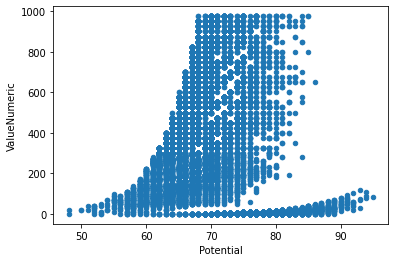

In [26]:
# Your code here:

fifa.plot.scatter('Potential','ValueNumeric');

#No veo que haya relación lineal
